In [1]:
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


# For reproducibility
np.random.seed(1000)


In [2]:
diabetes = load_diabetes()

# Create a linear regressor and compute CV score
lr = LinearRegression(normalize=True)
lr_scores = cross_val_score(lr, diabetes.data, diabetes.target, cv=10)
print('Linear regression CV score: %.6f' % lr_scores.mean())

Linear regression CV score: 0.461962


In [3]:
# Create a Ridge regressor and compute CV score
rg = Ridge(0.005, normalize=True)
rg_scores = cross_val_score(rg, diabetes.data, diabetes.target, cv=10)
print('Ridge regression CV score: %.6f' % rg_scores.mean())


Ridge regression CV score: 0.462758


In [4]:
# Create a Lasso regressor and compute CV score
ls = Lasso(0.01, normalize=True)
ls_scores = cross_val_score(ls, diabetes.data, diabetes.target, cv=10)
print('Lasso regression CV score: %.6f' % ls_scores.mean())


Lasso regression CV score: 0.461741


In [9]:
# Create ElasticNet regressor and compute CV score
en = ElasticNet(alpha=0.001, l1_ratio=0.8, normalize=True)
en_scores = cross_val_score(en, diabetes.data, diabetes.target, cv=10)
print('ElasticNet regression CV score: %.6f' % en_scores.mean())

ElasticNet regression CV score: 0.463589


In [11]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.1)

In [12]:
en.fit(X_train,Y_train)
print(en.coef_, en.intercept_)
y_hat = en.predict(X_test)
en.score(X_test, Y_test)

[  16.35735893 -241.55210976  460.98125436  287.02161005 -146.16039078
  -56.87001516 -192.68236775  142.86499753  439.5691811   104.11680729] 152.37025351223716


0.6390133286613491

In [18]:
lr.fit(X_train,Y_train)
print(lr.score(X_test, Y_test))
rg.fit(X_train,Y_train)
print(rg.score(X_test, Y_test))
ls.fit(X_train,Y_train)
print(ls.score(X_test, Y_test))
X_test.shape, Y_test.shape

0.6305871646065384
0.6377018606045481
0.6416096690228219


((45, 10), (45,))

In [30]:
encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8), max_iter=1000, n_alphas=100, n_jobs=1, normalize=True)
encv.fit(diabetes.data, diabetes.target)

ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001),
             l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8), n_jobs=1, normalize=True)

In [31]:
# ElasticNetCV helps determinate alpha and l1_ratio coeffs for penalizations.
print(encv.alpha_, encv.l1_ratio_)

0.001 0.8


Random sample consensus (Ransac) **randomly** selects **as small number of data points as possible** to obtain an initial solution, and then iteratively includes more inliers within a specified margin and update the solution, until a specified percentage of data is included.

In [32]:
from sklearn.linear_model import RANSACRegressor


In [33]:
nb_samples = 200
nb_noise_samples = 150

def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.scatter(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid()

    plt.show()

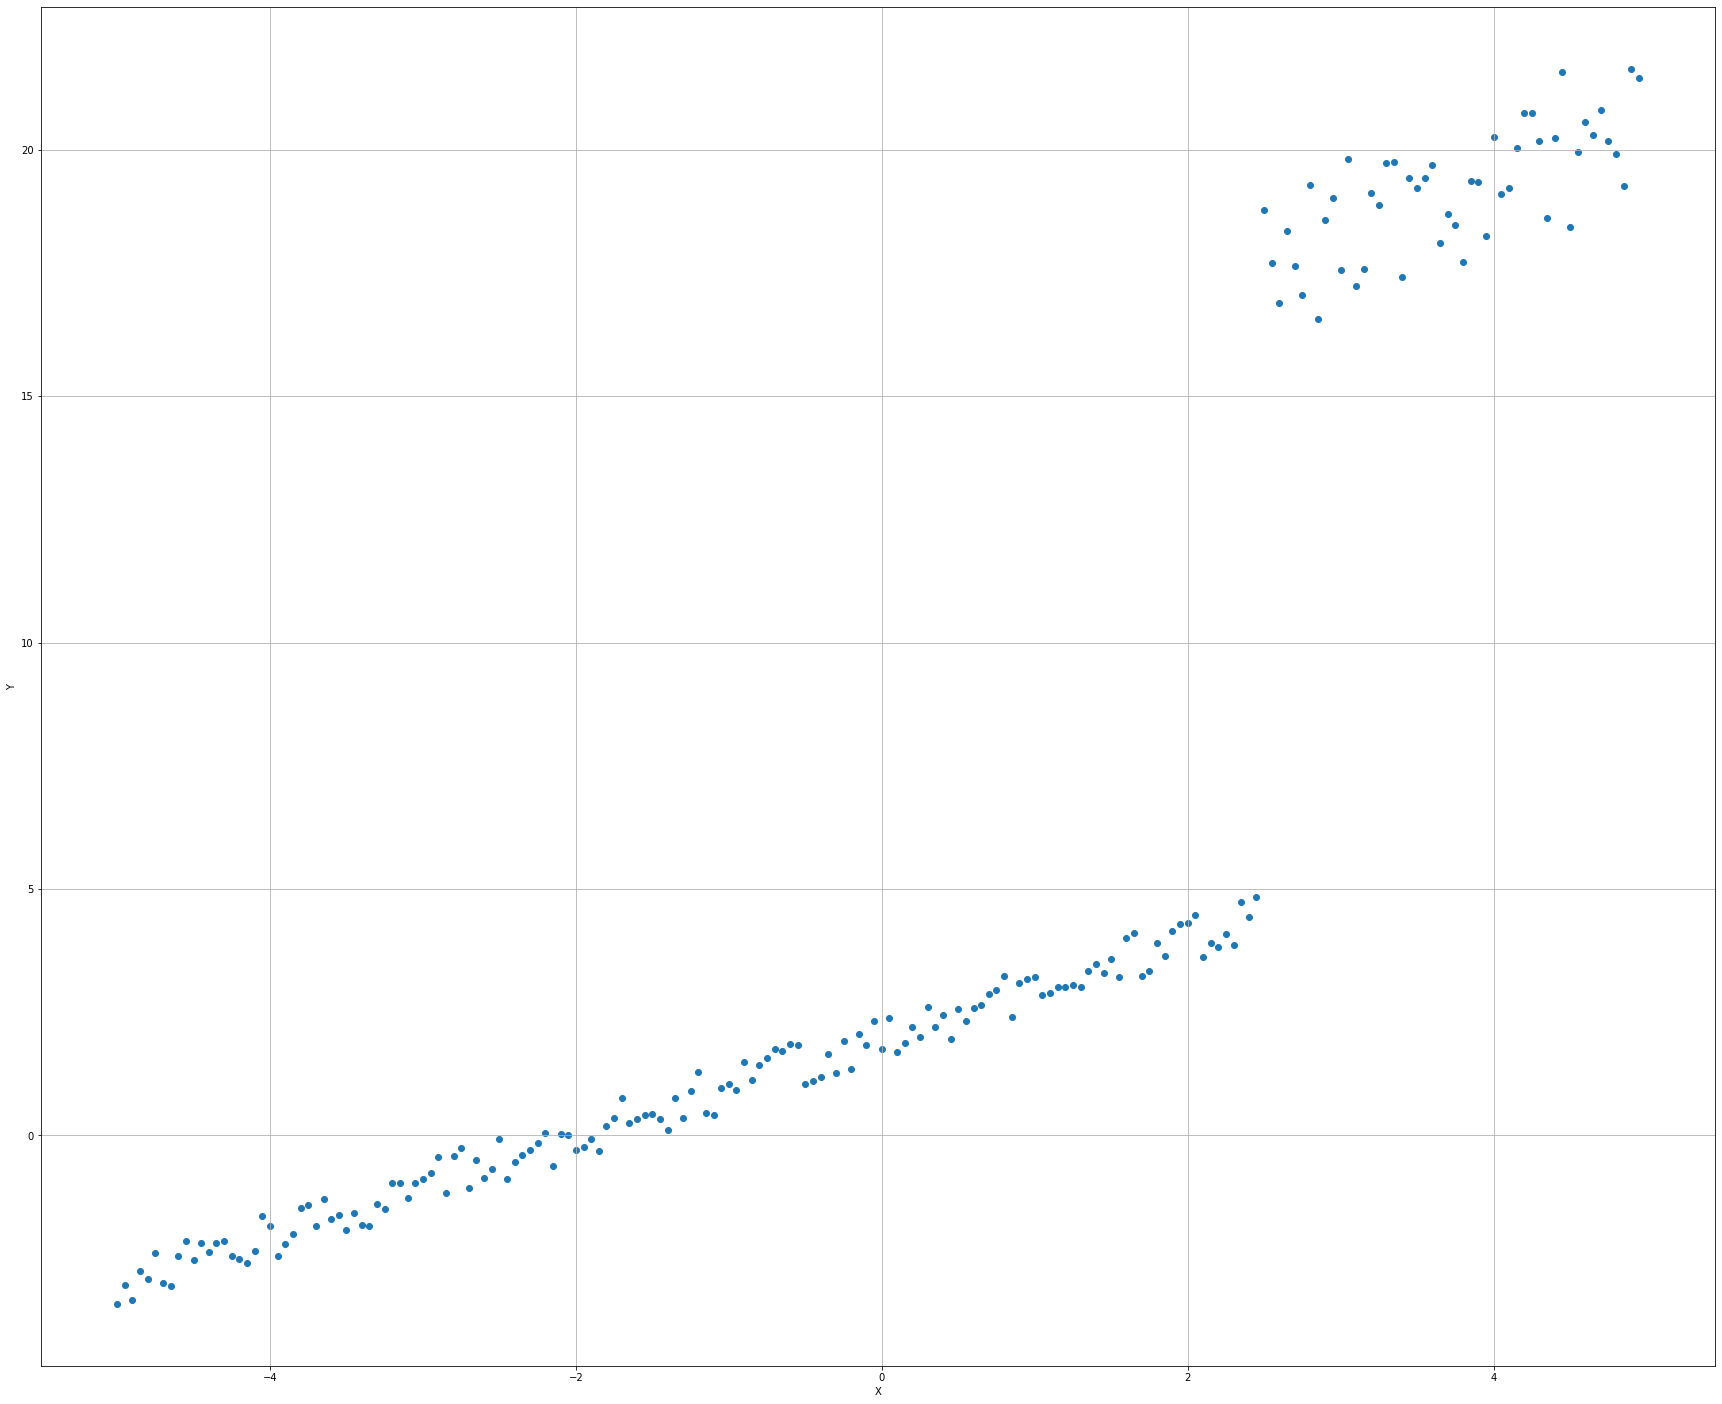

In [34]:
# Create dataset
X = np.arange(-5, 5, 0.05)

Y = X + 2
Y += np.random.uniform(-0.5, 0.5, size=nb_samples)

for i in range(nb_noise_samples, nb_samples):
    Y[i] += np.random.uniform(12, 15)

# Show the dataset
show_dataset(X, Y)

In [35]:
# Create a linear regressor
lr = LinearRegression(normalize=True)
lr.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
print('Standard regressor: y = %.3fx + %.3f' % (lr.coef_, lr.intercept_))

Standard regressor: y = 2.520x + 5.373


In [37]:
# Create RANSAC regressor
rs = RANSACRegressor(lr)
print(rs)
rs.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
print('RANSAC regressor: y = %.3fx + %.3f' % (rs.estimator_.coef_, rs.estimator_.intercept_))

RANSACRegressor(base_estimator=LinearRegression(normalize=True))
RANSAC regressor: y = 0.998x + 1.976
